In [3]:
using JLD, PyPlot

In [47]:
archivo="/home/karel/RGutWork/JLDFiles/140116s2cut2_evento_4.jld"

"/home/karel/RGutWork/JLDFiles/140116s2cut2_evento_4.jld"

In [48]:
Arxivo=load(archivo)

Dict{ByteString,Any} with 3 entries:
  "LFPTotal"              => 64x64x2001 Array{Float64,3}:…
  "kCSDconKernelPrestado" => 64x64x2001 Array{Float64,3}:…
  "freq"                  => 7.022058198545425

In [49]:
nota=Arxivo["Nota"]

LoadError: KeyError: Nota not found

In [50]:
CSD=Arxivo["kCSDconKernelPrestado"];
LFP=Arxivo["LFPTotal"];
#KOp=Arxivo["KTT_KInv"];

In [39]:
(alto,ancho,tmax)=size(CSD)

(64,64,2001)

In [51]:
satu=length(Arxivo["CanalesSaturados"])

LoadError: KeyError: CanalesSaturados not found

In [52]:
listonga=(135,139,149)   

(135,139,149)

In [53]:
freq=Arxivo["freq"]
#retrazo=Arxivo["retrazo"]

7.022058198545425

In [54]:
retrazo=0

0

In [55]:
Arxivo["Nota"]

LoadError: KeyError: Nota not found

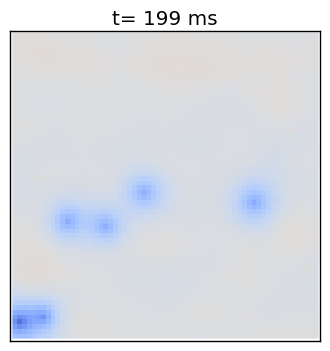

PyObject <matplotlib.image.AxesImage object at 0x7f0482fd2898>

In [56]:
t=1400
ion()
limites=250
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=round(Int,(t-retrazo)/freq)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
    left="off",
# ticks along the top edge are off
    labelbottom="off",
    labelleft="off")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="nearest",
                      cmap="coolwarm", 
                      vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

#cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
#cbx[:set_label]("<-Sink | Source->")

In [57]:
ioff()
limites=250
for t=500:7:1000
#t=954
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=round(Int,(t-retrazo)/freq)
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="nearest",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx[:set_label]("<-Sink | Source->")
    savefig("CSD_140116s2_04_$t.svg",dpi=90)
    close(figura)
end
PyPlot.close_figs()

In [52]:
bchica=readdlm("../kCSD/BceroDura-r-0.0675.dat")
btchica=readdlm("../kCSD/BtildeceroDura-r-0.0675.dat");

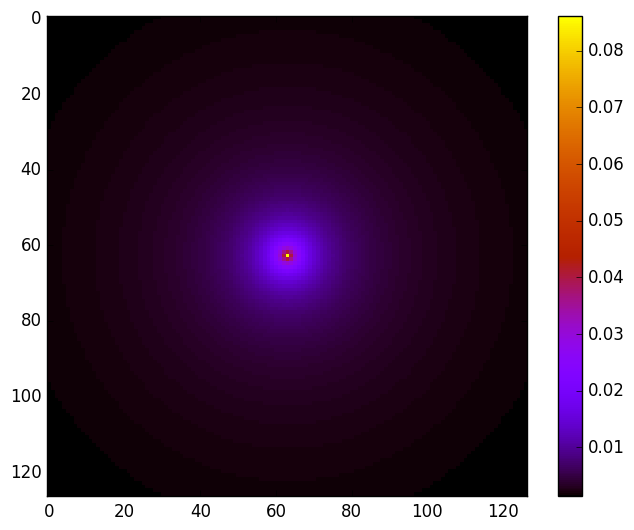

PyObject <matplotlib.colorbar.Colorbar object at 0x7f9877dc50b8>

In [53]:
aver=imshow(bchica,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [54]:
bgrande=readdlm("../kCSD/BceroDura-r-0.25.dat")
btgrande=readdlm("../kCSD/BtildeceroDura-r-0.25.dat");

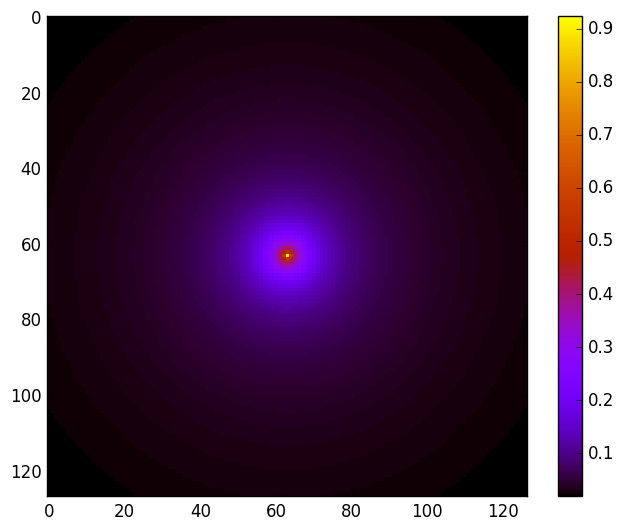

PyObject <matplotlib.colorbar.Colorbar object at 0x7f98785338d0>

In [50]:
aver=imshow(b,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [70]:
size(bgrande)
tu=vec(bgrande[64,:])
te=vec(bchica[64,:])

127-element Array{Float64,1}:
 0.00188806
 0.00191834
 0.00194959
 0.00198188
 0.00201526
 0.00204977
 0.00208548
 0.00212245
 0.00216075
 0.00220046
 0.00224164
 0.00228439
 0.0023288 
 ⋮         
 0.00228439
 0.00224164
 0.00220046
 0.00216075
 0.00212245
 0.00208548
 0.00204977
 0.00201526
 0.00198188
 0.00194959
 0.00191834
 0.00188806

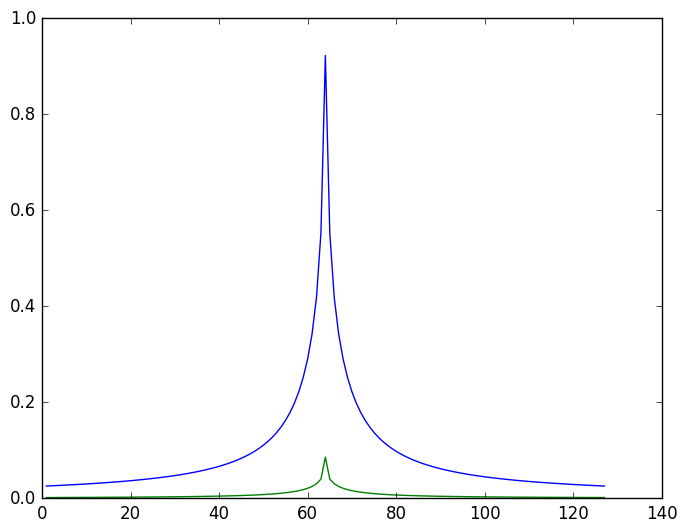

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f987709fa58>

In [72]:
plot(1:127,tu)
plot(1:127,te)

In [57]:
bgmin=bgrande/minimum(bgrande)

127x127 Array{Float64,2}:
 1.0      1.00794  1.01595  1.02401  …  1.02401  1.01595  1.00794  1.0    
 1.00794  1.01608  1.02428  1.03255     1.03255  1.02428  1.01608  1.00794
 1.01595  1.02428  1.03269  1.04116     1.04116  1.03269  1.02428  1.01595
 1.02401  1.03255  1.04116  1.04984     1.04984  1.04116  1.03255  1.02401
 1.03213  1.04088  1.0497   1.0586      1.0586   1.0497   1.04088  1.03213
 1.04031  1.04926  1.0583   1.06743  …  1.06743  1.0583   1.04926  1.04031
 1.04854  1.05771  1.06697  1.07632     1.07632  1.06697  1.05771  1.04854
 1.05682  1.06621  1.0757   1.08528     1.08528  1.0757   1.06621  1.05682
 1.06514  1.07476  1.08448  1.0943      1.0943   1.08448  1.07476  1.06514
 1.07351  1.08336  1.09332  1.10339     1.10339  1.09332  1.08336  1.07351
 1.08193  1.09201  1.10221  1.11253  …  1.11253  1.10221  1.09201  1.08193
 1.09037  1.1007   1.11115  1.12172     1.12172  1.11115  1.1007   1.09037
 1.09886  1.10943  1.12013  1.13096     1.13096  1.12013  1.10943  1.09886

In [59]:
cloack=bgmin-brmin

127x127 Array{Float64,2}:
  0.0         -4.93049e-7  -9.26669e-7   …  -4.93049e-7   0.0       
 -4.93049e-7   1.87244e-7   9.91145e-7       1.87244e-7  -4.93049e-7
 -9.26669e-7   9.91145e-7   9.43439e-7       9.91145e-7  -9.26669e-7
 -1.18418e-6   5.72591e-7  -4.27397e-7       5.72591e-7  -1.18418e-6
  2.0205e-8    6.06193e-8   1.95507e-7       6.06193e-8   2.0205e-8 
 -1.68787e-7  -3.80773e-7   4.0806e-7    …  -3.80773e-7  -1.68787e-7
 -3.64237e-7  -2.97511e-8   6.17864e-8      -2.97511e-8  -3.64237e-7
  1.70065e-7   1.59241e-9   3.62877e-7       1.59241e-9   1.70065e-7
 -4.06925e-7   8.07708e-8  -4.79393e-7       8.07708e-8  -4.06925e-7
  2.08605e-7  -5.05447e-8   5.62564e-7      -5.05447e-8   2.08605e-7
  7.70359e-7  -4.1385e-7    4.14957e-7   …  -4.1385e-7    7.70359e-7
  6.16851e-7   5.80022e-7  -6.68504e-8       5.80022e-7   6.16851e-7
  2.96029e-7   8.87429e-7   1.23119e-10      8.87429e-7   2.96029e-7
  ⋮                                      ⋱   ⋮                      
  6.1685

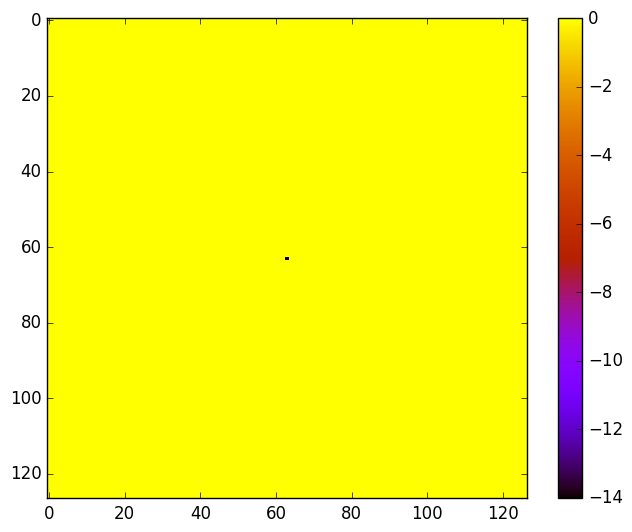

PyObject <matplotlib.colorbar.Colorbar object at 0x7f98776cf6a0>

In [63]:
imshow(cloack,cmap="gnuplot",interpolation="none")
colorbar()

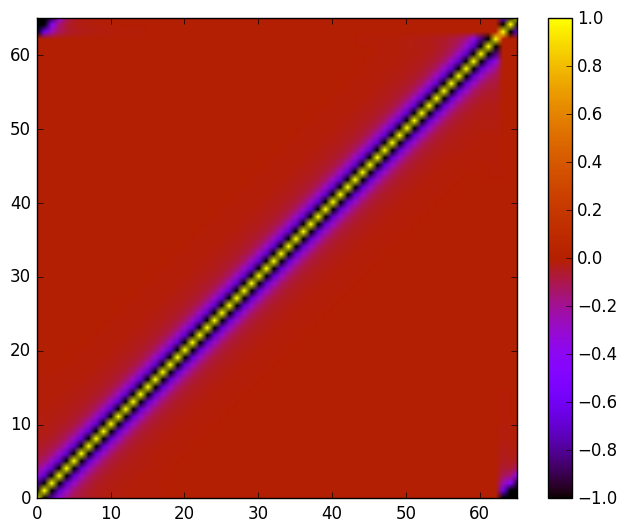

PyObject <matplotlib.colorbar.Colorbar object at 0x7f9876988240>

In [113]:
xlim(0,65)
ylim(0,65)
imshow(KOp,cmap="gnuplot", vmin=-1,vmax=1)
colorbar()

In [115]:
KOp[1:64,1:64]

64x64 Array{Float64,2}:
 12.8744      -1.79786      -0.776705     …  -0.00217285  -1.38234    
 -1.79786     13.1089       -1.65645         -0.00163671  -0.622402   
 -0.776705    -1.65645      13.168           -0.00141836  -0.2463     
 -0.334601    -0.710186     -1.63089         -0.0013365   -0.111321   
 -0.167043    -0.300289     -0.697039        -0.00130685  -0.0629945  
 -0.0982446   -0.146487     -0.292259     …  -0.00129952  -0.0424116  
 -0.065266    -0.0843402    -0.140965        -0.00130424  -0.031422   
 -0.0468737   -0.0550891    -0.0802575       -0.00131679  -0.0245291  
 -0.035439    -0.0390343    -0.0519251       -0.00133542  -0.0198062  
 -0.027804    -0.0291802    -0.0364982       -0.00135879  -0.0163982  
 -0.0224449   -0.0226699    -0.0270937    …  -0.00138629  -0.0138462  
 -0.0185371   -0.0181431    -0.0209176       -0.00141774  -0.0118783  
 -0.015597    -0.0148701    -0.0166467       -0.00145285  -0.0103237  
  ⋮                                       ⋱          